# IOT based Health Monitoring System using Different types of Machine Learning Algorithm.

# Package Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset Reading

In [2]:
Input_data = pd.read_csv("/kaggle/input/iot-dataset-csv/iot_dataset.csv")
Input_data

,Sl.No,Patient ID,Temperature Data,ECG Data,Pressure Data,Target
0,1,1,32,0,77,1
1,2,2,32,0,77,1
2,3,1,32,16,77,1
3,4,2,32,0,77,1
4,5,1,32,18,77,1
...,...,...,...,...,...,...
145,146,2,32,0,77,2
146,147,1,32,0,77,2
147,148,2,32,0,77,1
148,149,1,32,0,77,2


# Data PreProcessing

In [3]:
Input_data.head()

,Sl.No,Patient ID,Temperature Data,ECG Data,Pressure Data,Target
0,1,1,32,0,77,1
1,2,2,32,0,77,1
2,3,1,32,16,77,1
3,4,2,32,0,77,1
4,5,1,32,18,77,1


In [4]:
Input_data.tail()

,Sl.No,Patient ID,Temperature Data,ECG Data,Pressure Data,Target
145,146,2,32,0,77,2
146,147,1,32,0,77,2
147,148,2,32,0,77,1
148,149,1,32,0,77,2
149,150,2,32,0,77,1


In [5]:
Input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sl.No             150 non-null    int64
 1   Patient ID        150 non-null    int64
 2   Temperature Data  150 non-null    int64
 3   ECG Data          150 non-null    int64
 4   Pressure Data     150 non-null    int64
 5   Target            150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [6]:
Input_data.isnull().sum()

Sl.No               0
Patient ID          0
Temperature Data    0
ECG Data            0
Pressure Data       0
Target              0
dtype: int64

In [7]:
Input_data['Target'].value_counts()

Target
0    59
1    56
2    35
Name: count, dtype: int64

In [8]:
Input_data.shape

(150, 6)

# Data Visualization

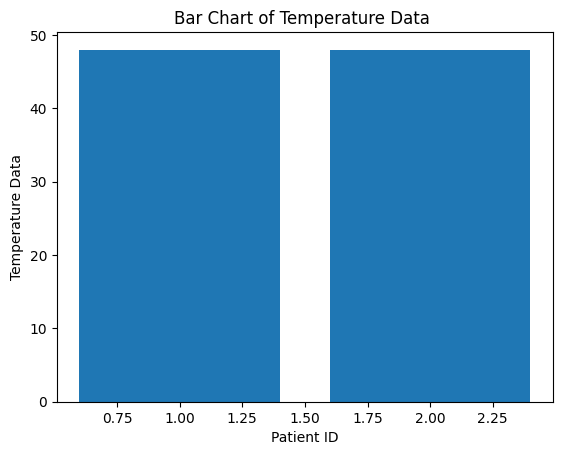

In [9]:
plt.bar(Input_data['Patient ID'],Input_data['Temperature Data']) 
plt.title("Bar Chart of Temperature Data ") 
plt.xlabel('Patient ID')
plt.ylabel('Temperature Data')
plt.show()

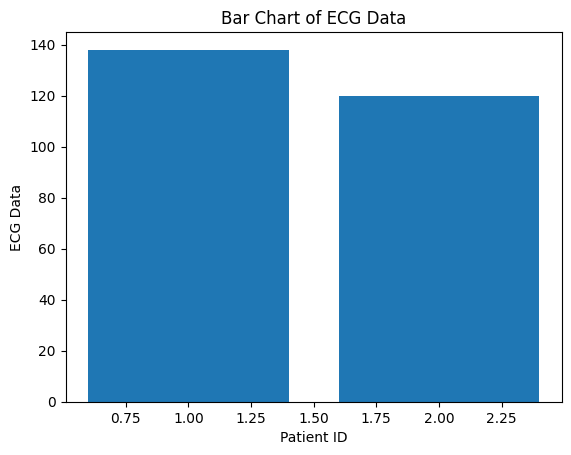

In [10]:
plt.bar(Input_data['Patient ID'],Input_data['ECG Data']) 
plt.title("Bar Chart of ECG Data") 
plt.xlabel('Patient ID')
plt.ylabel('ECG Data')
plt.show()

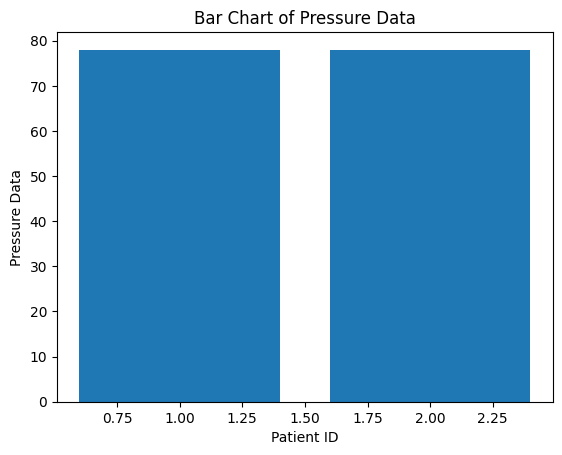

In [11]:
plt.bar(Input_data['Patient ID'],Input_data['Pressure Data']) 
plt.title("Bar Chart of Pressure Data") 
plt.xlabel('Patient ID')
plt.ylabel('Pressure Data')
plt.show()

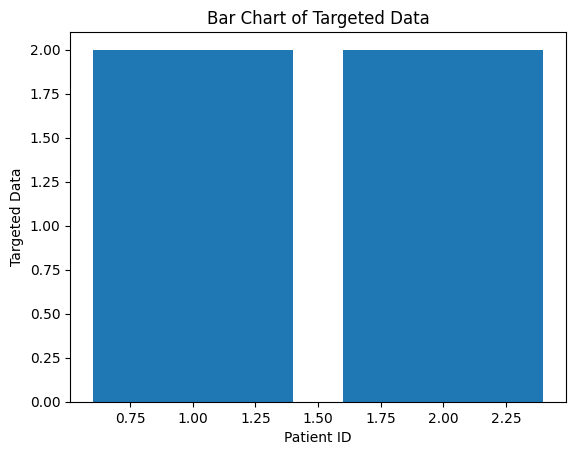

In [12]:
plt.bar(Input_data['Patient ID'],Input_data['Target']) 
plt.title("Bar Chart of Targeted Data") 
plt.xlabel('Patient ID')
plt.ylabel('Targeted Data')
plt.show()

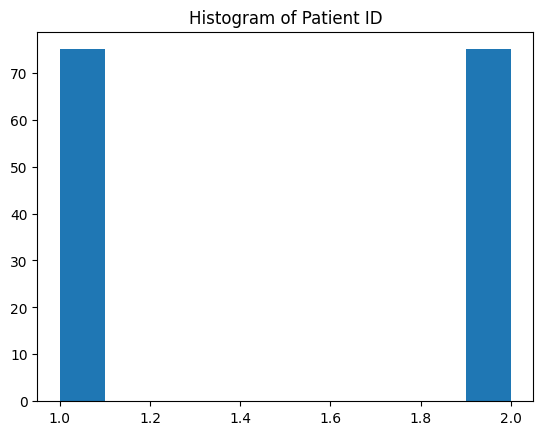

In [13]:
plt.hist(Input_data['Patient ID'])
plt.title("Histogram of Patient ID")
plt.show()

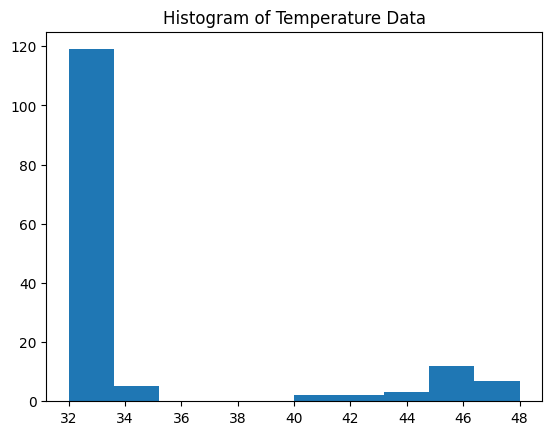

In [14]:
plt.hist(Input_data['Temperature Data'])
plt.title("Histogram of Temperature Data")
plt.show()

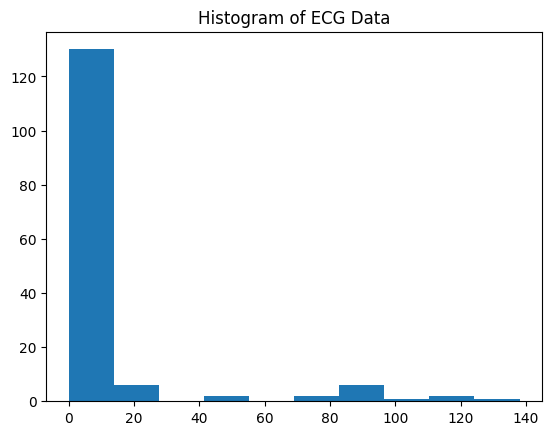

In [15]:
plt.hist(Input_data['ECG Data'])
plt.title("Histogram of ECG Data")
plt.show()

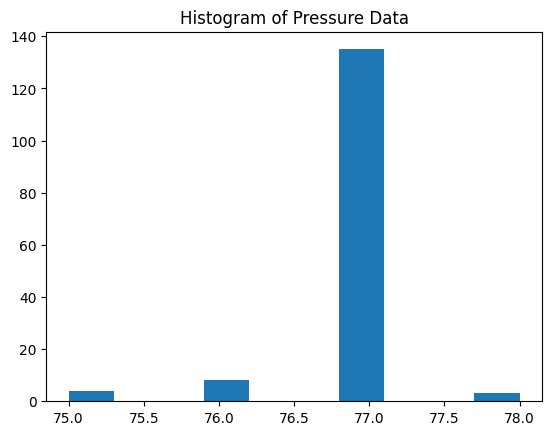

In [16]:
plt.hist(Input_data['Pressure Data'])
plt.title("Histogram of Pressure Data")
plt.show()

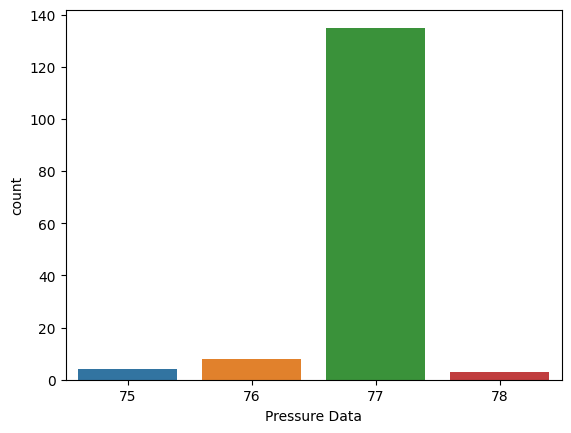

In [17]:
# count plot on single categorical variable
sns.countplot(x ='Pressure Data', data = Input_data)
 
# Show the plot
plt.show()

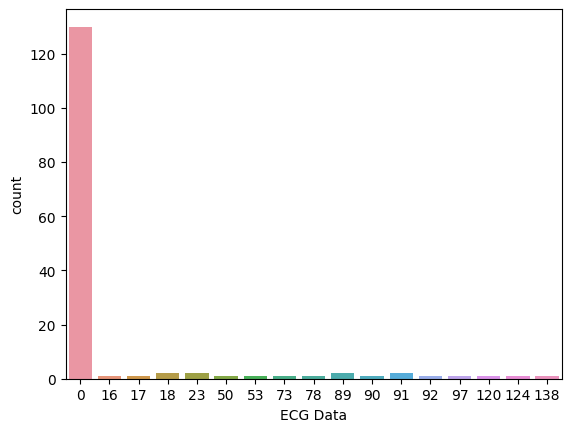

In [18]:
# count plot on single categorical variable
sns.countplot(x ='ECG Data', data = Input_data)
 
# Show the plot
plt.show()

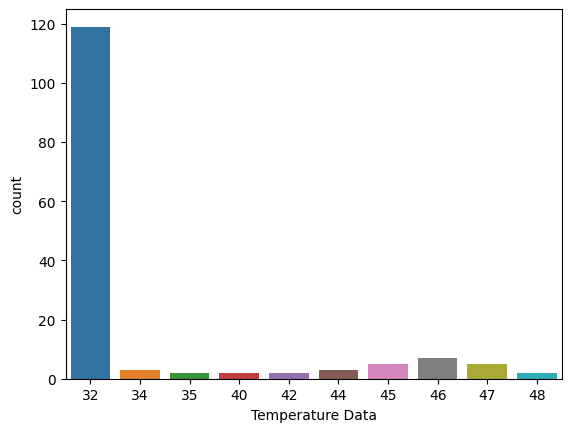

In [19]:
# count plot on single categorical variable
sns.countplot(x ='Temperature Data', data = Input_data)
 
# Show the plot
plt.show()

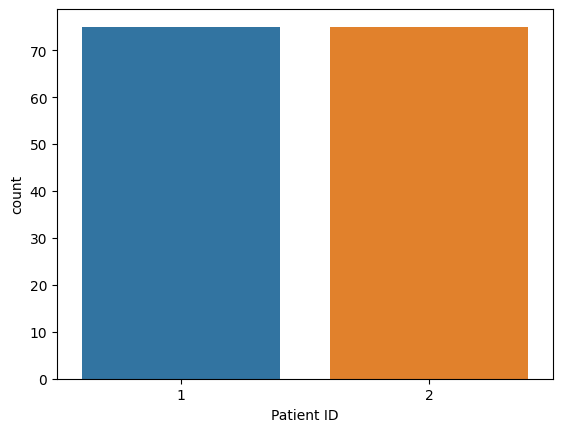

In [20]:
# count plot on single categorical variable
sns.countplot(x ='Patient ID', data = Input_data)
 
# Show the plot
plt.show()

<Axes: xlabel='Patient ID', ylabel='Density'>

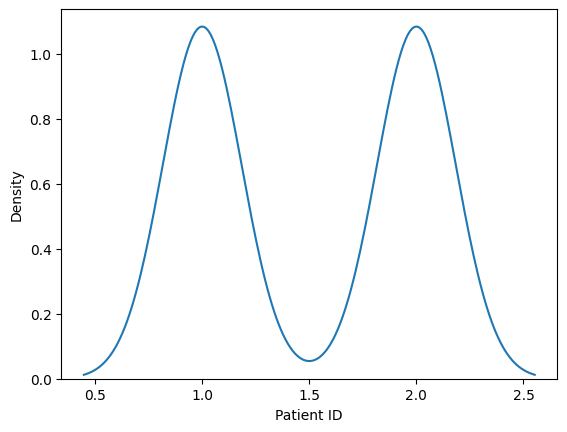

In [21]:
sns.kdeplot(Input_data['Patient ID'])

<Axes: xlabel='Temperature Data', ylabel='Density'>

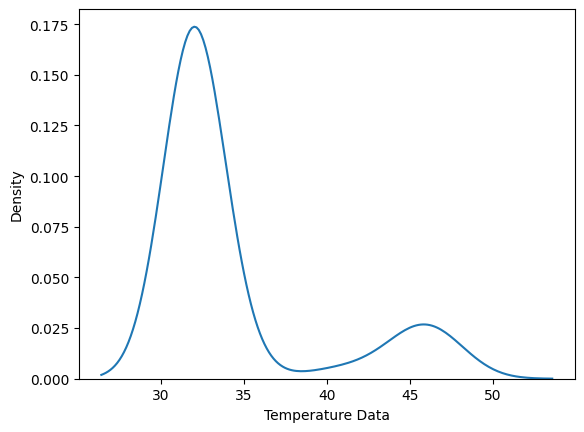

In [22]:
sns.kdeplot(Input_data['Temperature Data'])

<Axes: xlabel='ECG Data', ylabel='Density'>

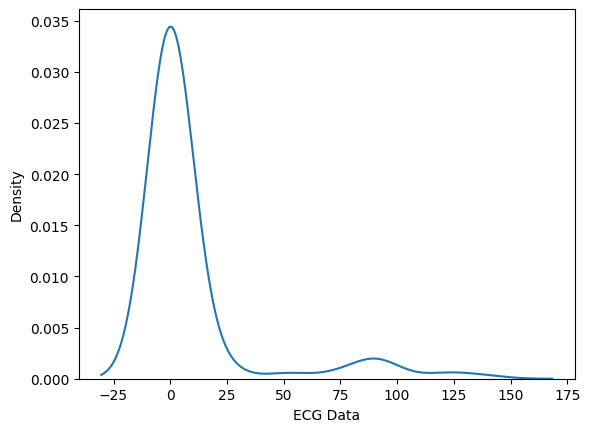

In [23]:
sns.kdeplot(Input_data['ECG Data'])

<Axes: xlabel='Pressure Data', ylabel='Density'>

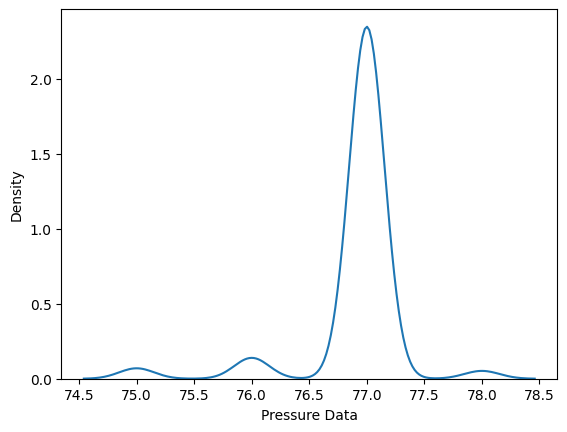

In [24]:
sns.kdeplot(Input_data['Pressure Data'])

<Axes: xlabel='Target', ylabel='Density'>

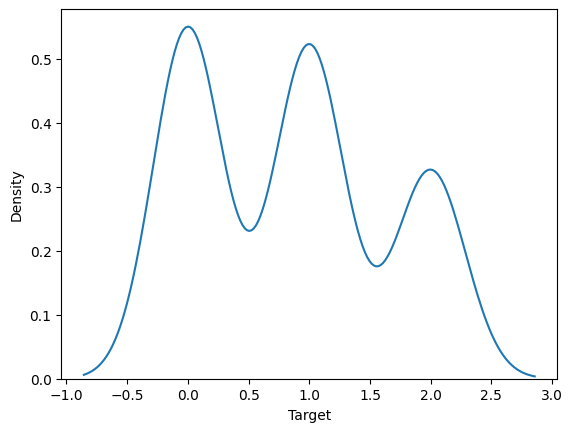

In [25]:
sns.kdeplot(Input_data['Target'])

<Axes: >

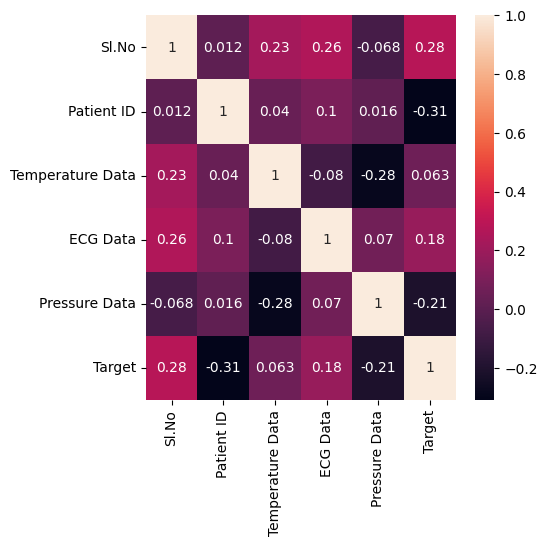

In [26]:
import seaborn as sns
corr = Input_data.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True)

# Model Implementation

In [27]:
X = Input_data.drop('Target',axis=1)
X

,Sl.No,Patient ID,Temperature Data,ECG Data,Pressure Data
0,1,1,32,0,77
1,2,2,32,0,77
2,3,1,32,16,77
3,4,2,32,0,77
4,5,1,32,18,77
...,...,...,...,...,...
145,146,2,32,0,77
146,147,1,32,0,77
147,148,2,32,0,77
148,149,1,32,0,77


In [28]:
Y = Input_data['Target']
Y 

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    1
148    2
149    1
Name: Target, Length: 150, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 =  train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)

#  Naive Bayes Algorithm

In [30]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics
NB_Algorithm = MultinomialNB()
NB_Algorithm.fit(x_train1, y_train1)
NB_Algorithm_Prediction = NB_Algorithm.predict(x_test1)
Accuracy_NB = metrics.accuracy_score(y_test1, NB_Algorithm_Prediction)
print('Accuracy of Naive Bayes Algorithm', Accuracy_NB)

Accuracy of Naive Bayes Algorithm 0.3


In [31]:
NB_Algorithm_Prediction

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0])

# Classification report and Confusion matrix of Naive Bayes Algorithm

              precision    recall  f1-score   support

           0       0.27      0.78      0.40         9
           1       0.00      0.00      0.00        11
           2       0.67      0.20      0.31        10

    accuracy                           0.30        30
   macro avg       0.31      0.33      0.24        30
weighted avg       0.30      0.30      0.22        30



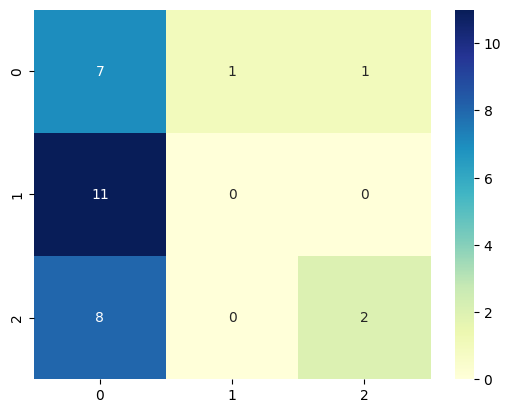

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
CM_NB=confusion_matrix(y_test1, NB_Algorithm_Prediction)
sns.heatmap(CM_NB, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, NB_Algorithm_Prediction))

# Decision Tree Algorithm

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT_Algorithm = DecisionTreeClassifier()
DT_Algorithm.fit(x_train1, y_train1)
DT_Algorithm_Prediction = DT_Algorithm.predict(x_test1)
Accuracy_DT = accuracy_score(y_test1, DT_Algorithm_Prediction)
print('Accuracy of Decision Tree Algorithm', Accuracy_DT)

Accuracy of Decision Tree Algorithm 0.6666666666666666


In [34]:
DT_Algorithm_Prediction

array([0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 0, 1])

# Classification report and Confusion matrix of Decision Tree Algorithm

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.62      0.91      0.74        11
           2       0.67      0.40      0.50        10

    accuracy                           0.67        30
   macro avg       0.68      0.66      0.65        30
weighted avg       0.68      0.67      0.65        30



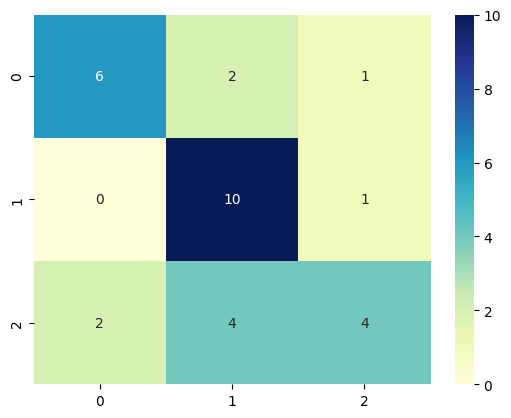

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
CM_DT=confusion_matrix(y_test1, DT_Algorithm_Prediction)
sns.heatmap(CM_DT, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, DT_Algorithm_Prediction))

# Logistic Regression Algorithm

In [36]:
from sklearn.linear_model import LogisticRegression
LR_Algorithm = LogisticRegression()
LR_Algorithm.fit(x_train1, y_train1)
LR_Algorithm_Prediction = LR_Algorithm.predict(x_test1)
Accuracy_LR = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Logistic Regression Algorithm', Accuracy_LR)

Accuracy of Logistic Regression Algorithm 0.5333333333333333


In [37]:
LR_Algorithm_Prediction

array([0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 2, 2, 0, 1])

# Classification report and Confusion matrix of Logistic Regression Algorithm

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.47      0.64      0.54        11
           2       0.80      0.40      0.53        10

    accuracy                           0.53        30
   macro avg       0.59      0.53      0.53        30
weighted avg       0.59      0.53      0.53        30



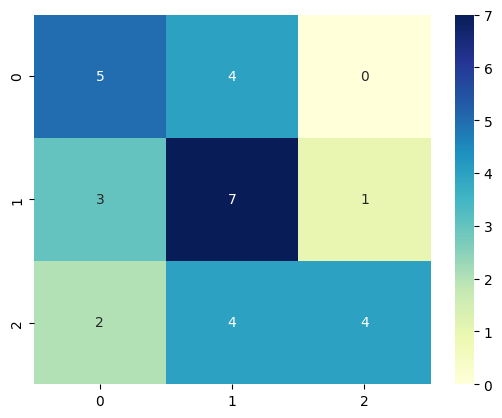

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
CM_LR=confusion_matrix(y_test1, LR_Algorithm_Prediction)
sns.heatmap(CM_LR, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, LR_Algorithm_Prediction))

# Support Vector Machine Algorithm

In [39]:
from sklearn.svm import SVC
SVM_Algorithm = SVC()
SVM_Algorithm.fit(x_train1, y_train1)
SVM_Algorithm_Prediction = SVM_Algorithm.predict(x_test1)
Accuracy_SVM = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Support Vector Machine Algorithm', Accuracy_SVM)

Accuracy of Support Vector Machine Algorithm 0.5333333333333333


In [40]:
SVM_Algorithm_Prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0])

# Classification report and Confusion matrix of Support Vector Machine Algorithm

              precision    recall  f1-score   support

           0       0.29      0.56      0.38         9
           1       0.50      0.55      0.52        11
           2       0.00      0.00      0.00        10

    accuracy                           0.37        30
   macro avg       0.26      0.37      0.30        30
weighted avg       0.27      0.37      0.31        30



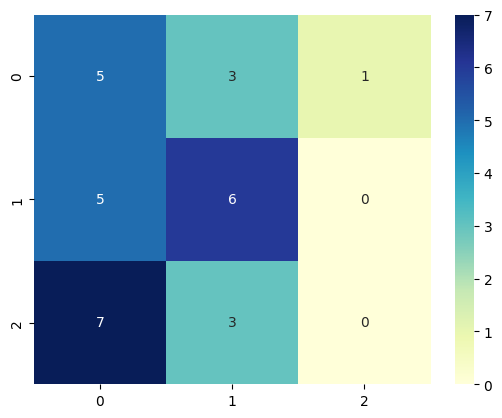

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
CM_SVM=confusion_matrix(y_test1, SVM_Algorithm_Prediction)
sns.heatmap(CM_SVM, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, SVM_Algorithm_Prediction))

# Random Forest Classifier

Shape of x_train1: (120, 5)
Shape of y_train1: (120,)
    Sl.No  Patient ID  Temperature Data  ECG Data  Pressure Data
22     23           1                32         0             77
15     16           2                32         0             77
65     66           2                32         0             77
11     12           2                32         0             77
42     43           1                32         0             77
Unique values in y_train1: [1 0 2]
Random Forest successfully fitted.
Accuracy of Random Forest Classifier: 0.6333333333333333


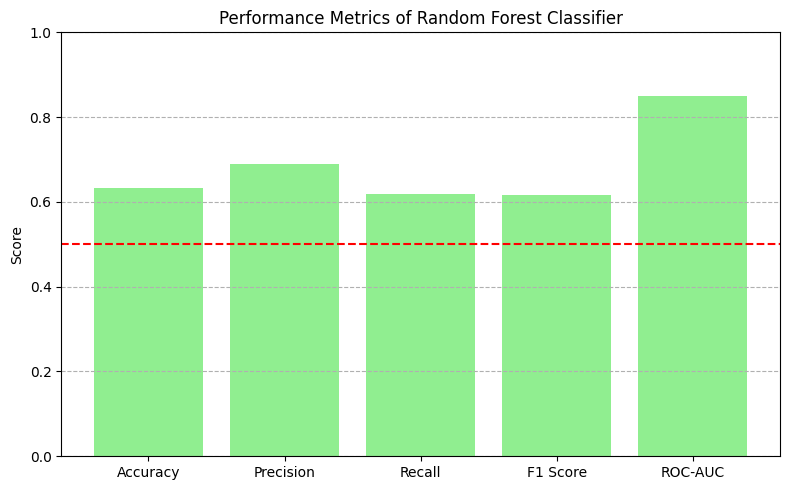

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Check the shape and content of training data
print("Shape of x_train1:", x_train1.shape)
print("Shape of y_train1:", y_train1.shape)
print(x_train1.head())
print("Unique values in y_train1:", y_train1.unique())

# Encode y_train1 if necessary
label_encoder = LabelEncoder()
y_train1 = label_encoder.fit_transform(y_train1)
y_test1 = label_encoder.transform(y_test1)

# Initialize the Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
try:
    RF_Classifier.fit(x_train1, y_train1)
    print("Random Forest successfully fitted.")
except Exception as e:
    print("Error during model fitting:", e)

# Make predictions on the test data
try:
    RF_Prediction = RF_Classifier.predict(x_test1)

    # Calculate performance metrics for multiclass
    Accuracy_RF = accuracy_score(y_test1, RF_Prediction)
    Precision_RF = precision_score(y_test1, RF_Prediction, average='macro')  # Using 'macro' for multiclass
    Recall_RF = recall_score(y_test1, RF_Prediction, average='macro')        # Using 'macro' for multiclass
    F1_Score_RF = f1_score(y_test1, RF_Prediction, average='macro')          # Using 'macro' for multiclass
    ROC_AUC_RF = roc_auc_score(y_test1, RF_Classifier.predict_proba(x_test1), multi_class='ovr')  # For multiclass ROC-AUC

    # Print accuracy
    print('Accuracy of Random Forest Classifier:', Accuracy_RF)

    # Prepare data for performance matrix graph
    performance_data = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'],
        'Score': [Accuracy_RF, Precision_RF, Recall_RF, F1_Score_RF, ROC_AUC_RF]
    }

    # Create a DataFrame
    performance_df = pd.DataFrame(performance_data)

    # Plotting the performance metrics
    plt.figure(figsize=(8, 5))
    plt.bar(performance_df['Metric'], performance_df['Score'], color='lightgreen')
    plt.title('Performance Metrics of Random Forest Classifier')
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.axhline(0.5, color='red', linestyle='--')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    # Show the plot
    plt.show()

except Exception as e:
    print("Error during predictions or performance calculation:", e)


# Comparison Plot of all the Graph

Text(0.5, 1.0, 'Comparison Graph of all the Algorithm')

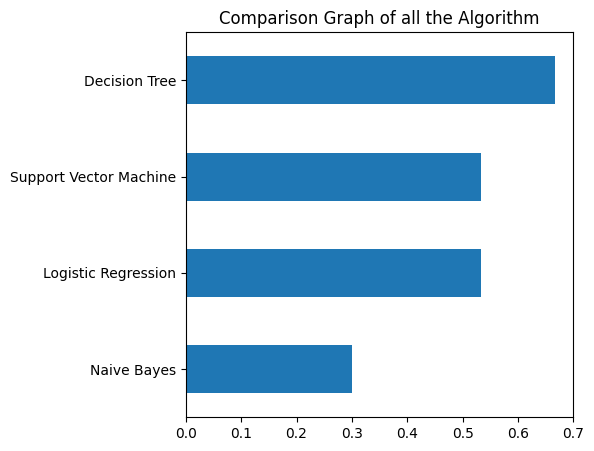

In [43]:
model_accuracy = pd.Series(data=[Accuracy_NB,Accuracy_DT,Accuracy_LR,Accuracy_SVM], 
                index=['Naive Bayes','Decision Tree','Logistic Regression','Support Vector Machine'])
fig= plt.figure(figsize=(5,5))
model_accuracy.sort_values().plot.barh()
plt.title('Comparison Graph of all the Algorithm')

# Final Prediction Model

In [44]:
Final_Prediction_data = (71,1,32,0,77)
Final_Prediction_data = np.array(Final_Prediction_data)
Final_Prediction_data = Final_Prediction_data.reshape(1,-1)
Final_prediction = DT_Algorithm.predict(Final_Prediction_data)

if Final_prediction == 0:
    print("The Patient Condition is Low")
elif Final_prediction == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")

The Patient Condition is High


In [45]:
Final_Prediction_data = (10,2,32,0,77)
Final_Prediction_data = np.array(Final_Prediction_data)
Final_Prediction_data = Final_Prediction_data.reshape(1,-1)
Final_prediction = DT_Algorithm.predict(Final_Prediction_data)

if Final_prediction == 0:
    print("The Patient Condition is Low")
elif Final_prediction == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")

The Patient Condition is Medium


In [46]:
Final_Prediction_data = (43,1,32,0,77)
Final_Prediction_data = np.array(Final_Prediction_data)
Final_Prediction_data = Final_Prediction_data.reshape(1,-1)
Final_prediction = DT_Algorithm.predict(Final_Prediction_data)

if Final_prediction == 0:
    print("The Patient Condition is Low")
elif Final_prediction == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")

The Patient Condition is High
